#                               Clustering and Dimensionality Reduction in Machine Learning

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings('ignore')


# Load Dataset

In [6]:
df = pd.read_csv(r'C:\Users\HP\Downloads\archive (1)\Mall_Customers.csv')  
df.head()


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

# Explore the Dataset

In [7]:
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

# Preprocessing

. Drop unnecessary columns

. Encode categorical columns

. Standardize the numerical data




In [8]:
# Drop CustomerID
if 'CustomerID' in df.columns:
    df.drop('CustomerID', axis=1, inplace=True)

# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Standard Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


# Dimensionality Reduction with PCA

Explained Variance Ratio: [0.33690046 0.26230645]


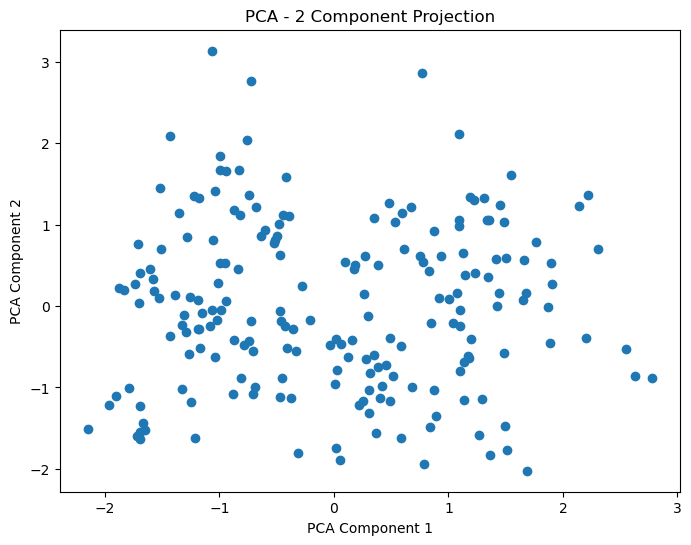

In [9]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Explained Variance Ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# 2D PCA Plot
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title("PCA - 2 Component Projection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


# K-Means Clustering (with Elbow Method)

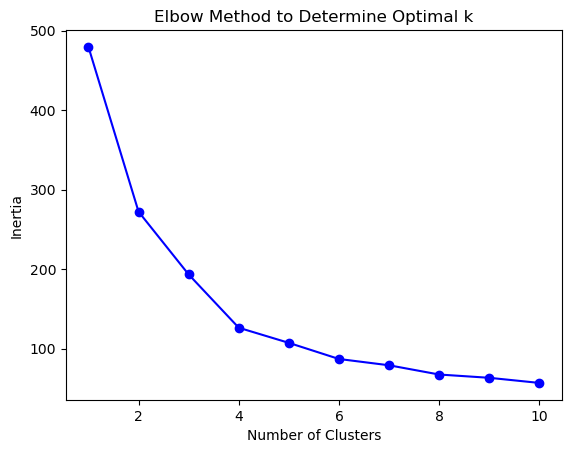

In [10]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Elbow Plot
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


#  Apply K-Means with Optimal k (e.g., k = 5)

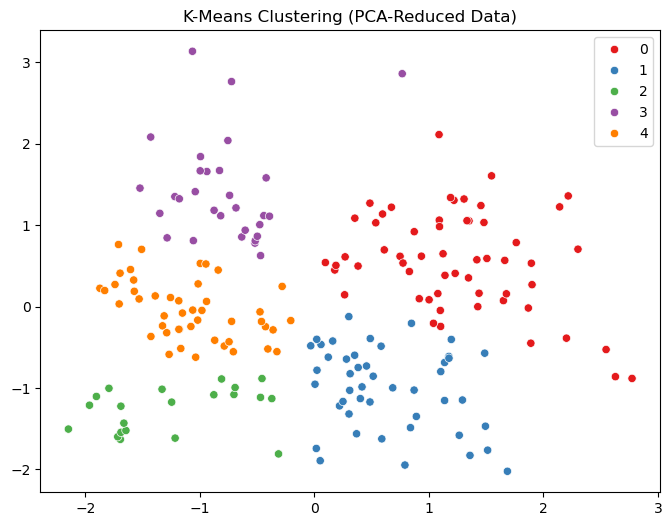

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)

# Cluster Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=kmeans_labels, palette='Set1')
plt.title("K-Means Clustering (PCA-Reduced Data)")
plt.show()


#  DBSCAN Clustering
Estimate eps using k-distance

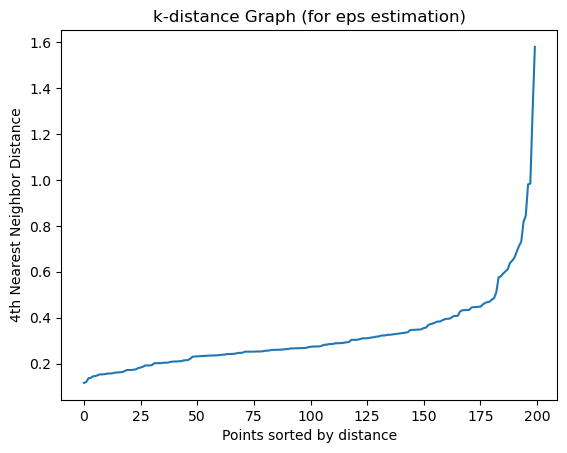

In [12]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(pca_data)
distances, indices = nbrs.kneighbors(pca_data)
distances = np.sort(distances[:, 4], axis=0)

plt.plot(distances)
plt.title('k-distance Graph (for eps estimation)')
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()


Apply DBSCAN

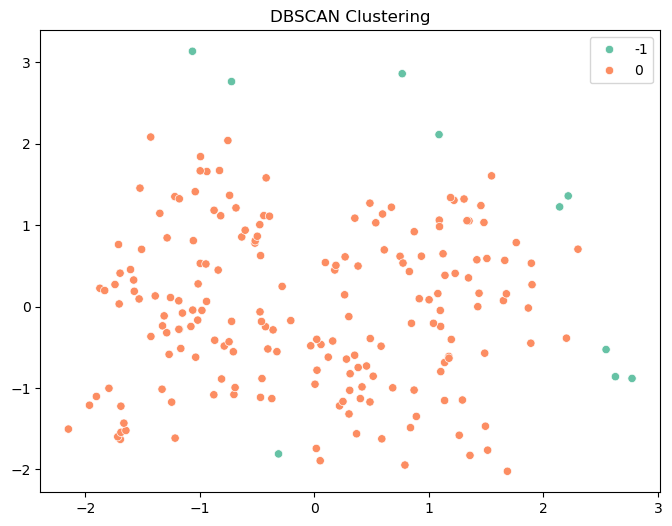

In [13]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)

# Plot DBSCAN Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=dbscan_labels, palette='Set2')
plt.title("DBSCAN Clustering")
plt.show()


# Clustering Evaluation

In [15]:
# K-Means Metrics
print("K-Means Silhouette Score:", silhouette_score(pca_data, kmeans_labels))
print("K-Means Davies-Bouldin Index:", davies_bouldin_score(pca_data, kmeans_labels))

# DBSCAN Metrics (if valid clusters)
filtered_data = pca_data[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]

unique_labels = set(filtered_labels)

if len(unique_labels) >= 2:
    print("DBSCAN Silhouette Score:", silhouette_score(filtered_data, filtered_labels))
    print("DBSCAN Davies-Bouldin Index:", davies_bouldin_score(filtered_data, filtered_labels))
else:
    print("DBSCAN did not form enough clusters for evaluation.")

K-Means Silhouette Score: 0.40376893724746793
K-Means Davies-Bouldin Index: 0.8469946082836606
DBSCAN did not form enough clusters for evaluation.


## Interpretation of Results
📊 K-Means
Silhouette Score = 0.40

Moderate clustering quality.

Values close to 1 are best; 0.4 suggests some overlap between clusters but still meaningful.

Davies-Bouldin Index = 0.84

Lower is better (ideal: close to 0).

This value indicates reasonably well-separated clusters, but there is still room for improvement.

⚠️ DBSCAN
Message: "DBSCAN did not form enough clusters for evaluation."

Means DBSCAN failed to identify 2 or more clusters.

Likely causes:

eps too small

min_samples too high

PCA-reduced data lost separability



# Conclusion
K-Means worked well on PCA-reduced customer data.

DBSCAN was not suitable with current parameters — or the dataset may lack dense cluster structure suitable for DBSCAN.

